In [4]:
from Problem import Problem
import networkx as nx
import matplotlib.pyplot as plt
from src.instance import Solution
from src.genetic_algorithm import GeneticAlgorithm
from itertools import product
import pandas as pd
import os

os.makedirs("experiments", exist_ok=True)
num_experiments = len(os.listdir("experiments"))

In [5]:
number_cities = [100, 1000]
alphas = [1, 2]
betas = [1, 2]
densities = [0.2, 1]

Testing with 100 cities, alpha=1, beta=1, density=0.2


  0%|          | 0/50 [00:00<?, ?it/s]

Baseline solution: 25266.40561851072
GA solution: 24393.502092289058


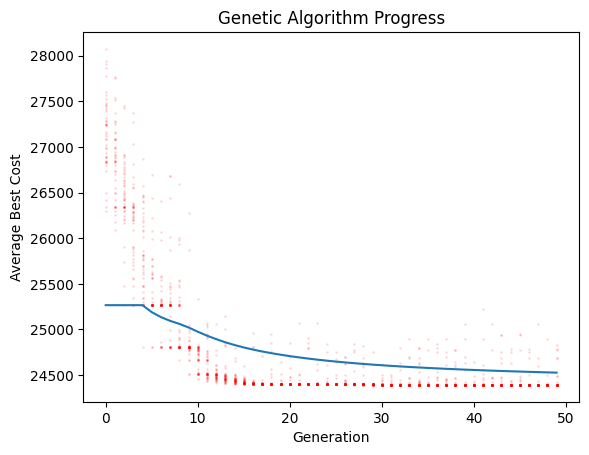

Testing with 100 cities, alpha=1, beta=1, density=1


  0%|          | 0/50 [00:00<?, ?it/s]

Baseline solution: 18266.18579582672
GA solution: 14887.611554308643


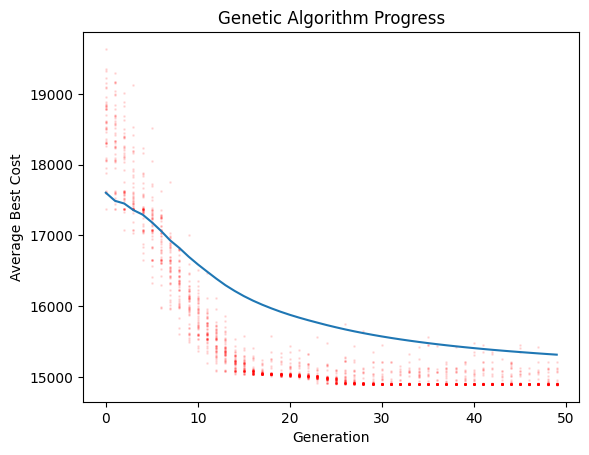

Testing with 100 cities, alpha=1, beta=2, density=0.2


  0%|          | 0/50 [00:00<?, ?it/s]

Baseline solution: 5334401.927002504
GA solution: 4915753.9150452325


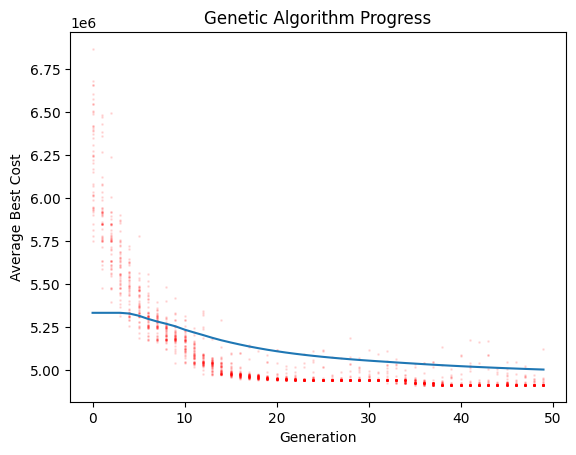

Testing with 100 cities, alpha=1, beta=2, density=1


  0%|          | 0/50 [00:00<?, ?it/s]

Baseline solution: 5404978.08899582
GA solution: 2410596.6781955766


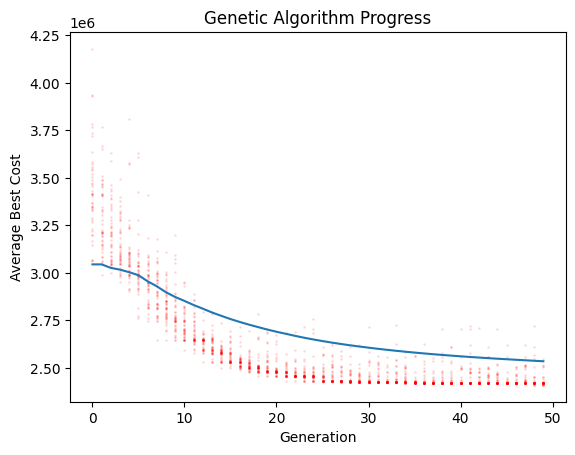

Testing with 100 cities, alpha=2, beta=1, density=0.2


  0%|          | 0/50 [00:00<?, ?it/s]

Baseline solution: 50425.30961817918
GA solution: 47002.11024260467


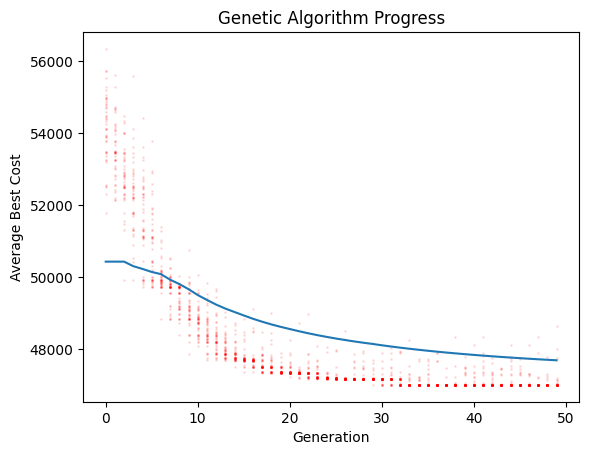

Testing with 100 cities, alpha=2, beta=1, density=1


  0%|          | 0/50 [00:00<?, ?it/s]

Baseline solution: 36457.918462372065
GA solution: 29534.280074156504


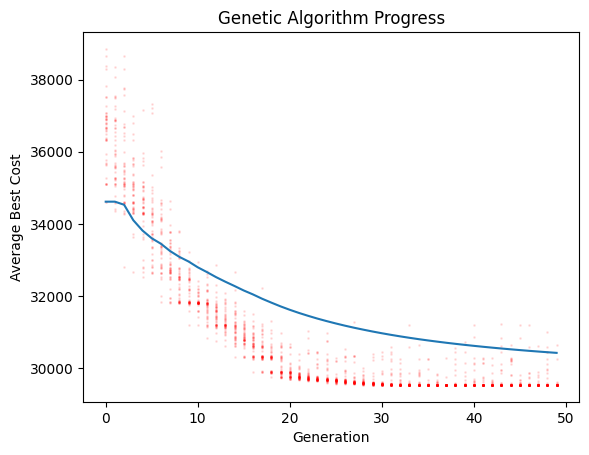

Testing with 100 cities, alpha=2, beta=2, density=0.2


  0%|          | 0/50 [00:00<?, ?it/s]

Baseline solution: 21337285.20315348
GA solution: 19737388.34515269


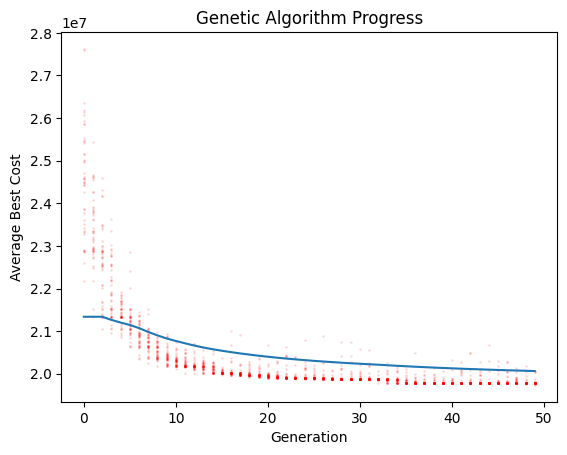

Testing with 100 cities, alpha=2, beta=2, density=1


  0%|          | 0/50 [00:00<?, ?it/s]

Baseline solution: 21619688.99659544
GA solution: 9270216.726013893


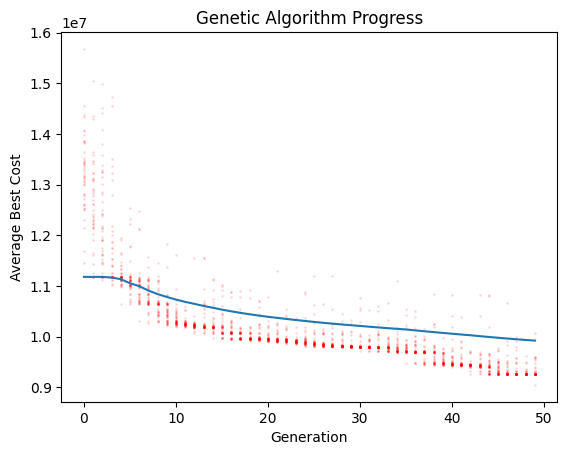

Testing with 1000 cities, alpha=1, beta=1, density=0.2


  0%|          | 0/20 [00:00<?, ?it/s]

Baseline solution: 195402.95810394012
GA solution: 195402.95810394053


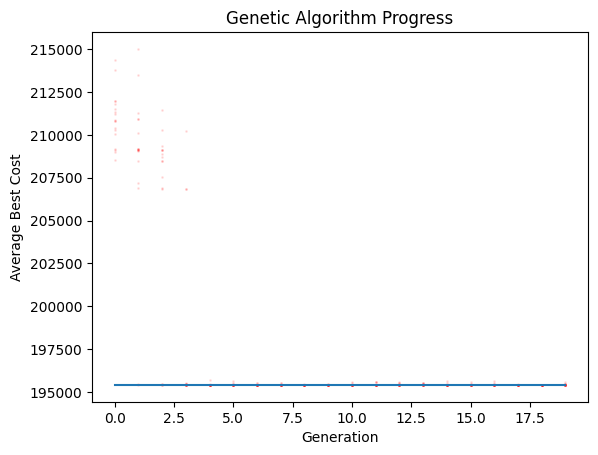

Testing with 1000 cities, alpha=1, beta=1, density=1


  0%|          | 0/20 [00:00<?, ?it/s]

Baseline solution: 192936.23377726765
GA solution: 181518.80885297645


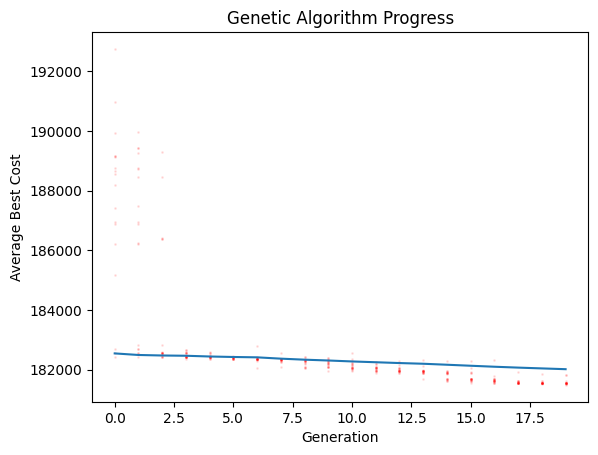

Testing with 1000 cities, alpha=1, beta=2, density=0.2


  0%|          | 0/20 [00:00<?, ?it/s]

Baseline solution: 37545927.70213464
GA solution: 21242248.098630473


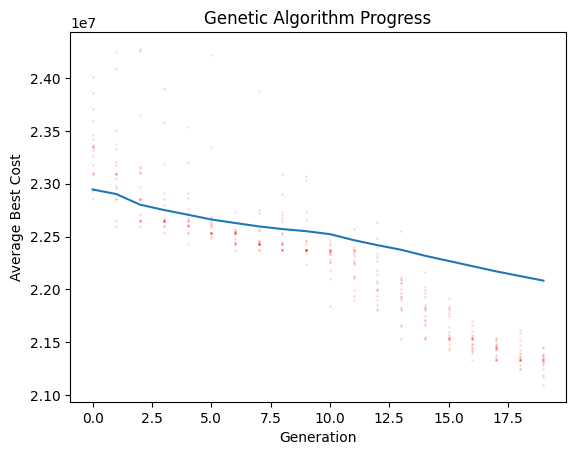

Testing with 1000 cities, alpha=1, beta=2, density=1


  0%|          | 0/20 [00:00<?, ?it/s]

Baseline solution: 57580018.86872502
GA solution: 15390199.276081238


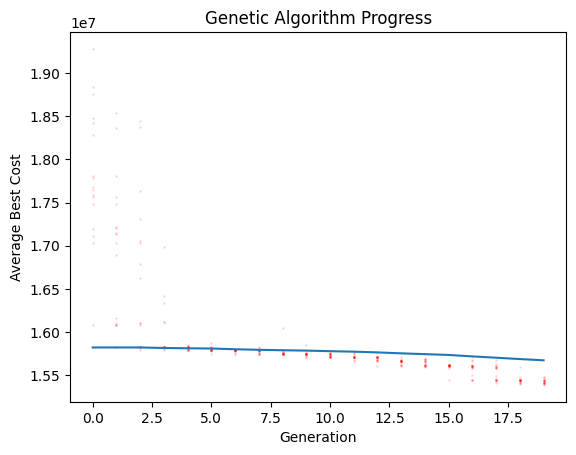

Testing with 1000 cities, alpha=2, beta=1, density=0.2


  0%|          | 0/20 [00:00<?, ?it/s]

Baseline solution: 390028.72126288974
GA solution: 390028.72126288904


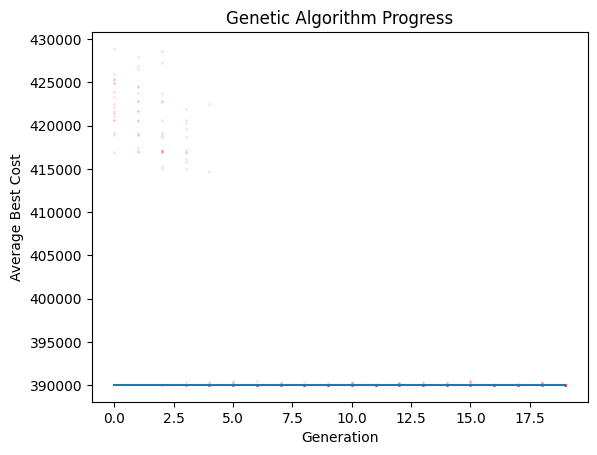

Testing with 1000 cities, alpha=2, beta=1, density=1


  0%|          | 0/20 [00:00<?, ?it/s]

Baseline solution: 385105.64149576554
GA solution: 360978.75220779417


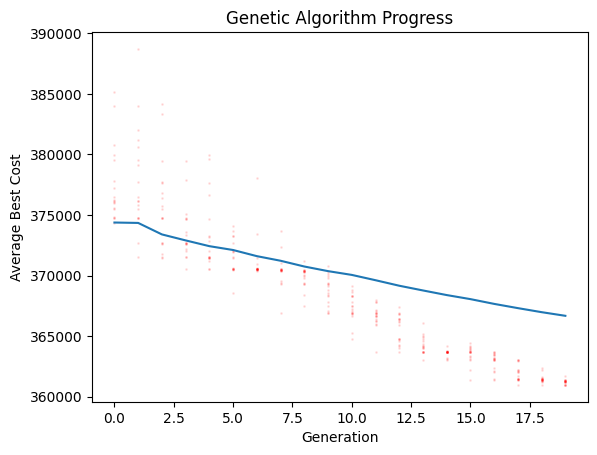

Testing with 1000 cities, alpha=2, beta=2, density=0.2


  0%|          | 0/20 [00:00<?, ?it/s]

Baseline solution: 150181379.22370395
GA solution: 84423180.3251752


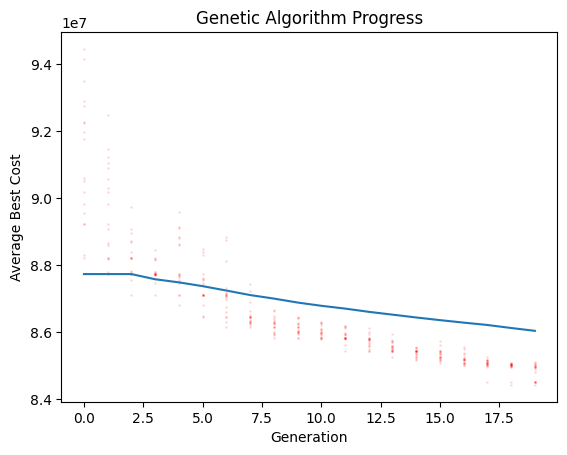

Testing with 1000 cities, alpha=2, beta=2, density=1


  0%|          | 0/20 [00:00<?, ?it/s]

Baseline solution: 230317774.99672347
GA solution: 62348655.949901596


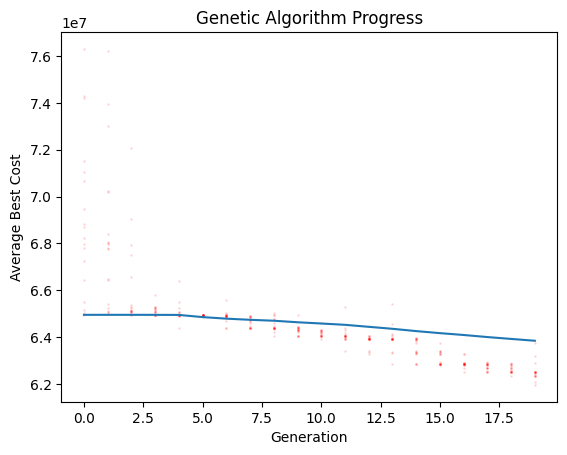

In [6]:
for i, (num_cities, alpha, beta, density) in enumerate(product(number_cities, alphas, betas, densities)):
    problem = Problem(num_cities, alpha=alpha, beta=beta, density=density)
    print(f"Testing with {num_cities} cities, alpha={alpha}, beta={beta}, density={density}")
    G = problem.graph
    pos_dict = {k: v['pos'] for k, v in G.nodes(data=True)}
    gold_dict = {n: data['gold'] for n, data in G.nodes(data=True)}
    paths_dict = nx.shortest_path(problem.graph, source=0, weight='dist')
    population_size = 50 if num_cities == 100 else 20
    max_generations = 50 if num_cities == 100 else 20
    density = nx.density(G)
    pd_param = 0.3 if density < 0.5 else 0.5
    GA = GeneticAlgorithm(problem, population_size=population_size, max_generations=max_generations, mutation_rate=0.5, mutation_choice=0.5, pd_param=pd_param)
    best_solution, best_cost = GA.solve()
    base_cost = problem.baseline()
    print(f"Baseline solution: {base_cost}")
    print(f"GA solution: {best_cost}")
    log_dir = f"experiments/exp_{i+num_experiments}"
    os.makedirs(log_dir, exist_ok=True)
    GA.log(log_dir=log_dir, baseline_cost=base_cost)
    GA.plot_history()